# Decoder in Transformer Architeture

In the transformer architecture, the decoder plays a crucial role in generating the output sequence. We will use the example sentence "The cat sat on the mat." to illustrate these concepts.

#### Overview of the Decoder
The decoder in the transformer architecture generates output sequences based on two key inputs:

**1. Encoder Output:** The contextualized embeddings generated by the encoder.

**2. Target Sequence:** The sequence of tokens generated so far, starting with a special **`[START]`** token.

### Output Shifted to the Right

- **What is Output Shifted to the Right?**
  - The expected output sequence is the sequence that the model should generate. For example, if the input sentence is "The cat sat on the mat," the expected output sequence might be "The cat sat on the mat [END]."
  - To create the target sequence for the decoder, we shift this expected output sequence to the right by one position and add a `[START]` token at the beginning.

- **Why Shift the Output to the Right?**
  - Shifting the output to the right ensures that the decoder generates the output sequence in an autoregressive manner. This means that the decoder generates one token at a time, using the previously generated tokens as context for the next token.
  - By adding the `[START]` token at the beginning, we provide the decoder with a clear starting point for generating the output sequence.

**Example**:
- Expected Output Sequence: `["The", "cat", "sat", "on", "mat", "[END]"]`
- Target Sequence: `["[START]", "The", "cat", "sat", "on", "mat"]`


## Step 1: Input to the Decoder

### 1. Target Sequence

- The target sequence is the sequence of tokens that the decoder has generated so far. It starts with a special **start token** (`[START]`), includes all the words from the expected output sequence, and ends with an **end token** (`[END]`).

- **Example**: For our example sentence, the expected output sequence is `["The", "cat", "sat", "on", "mat", "[END]"]`. The target sequence for the decoder includes the `[START]` token followed by all the words in the expected output sequence:
  - **Target Sequence**: `["[START]", "The", "cat", "sat", "on", "mat", "[END]"]`

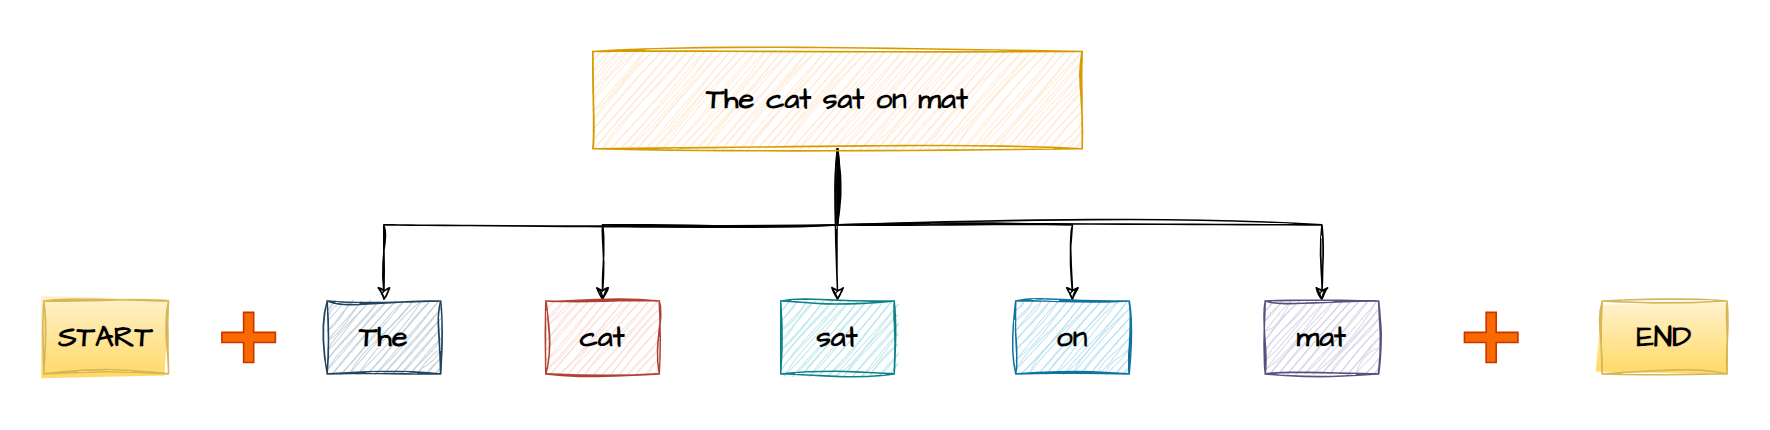

## Step 2: Output Embedding

- The target sequence is converted into dense vector representations using an **output embedding matrix**. This matrix is learned during training and maps each token to a vector in a continuous space.

- **How it Works**: Each token in the target sequence is transformed into its corresponding embedding. For example:
  - `[START]` might be represented as `[0.1, 0.2, 0.3]`
  - `"The"` might be represented as `[0.2, 0.1, 0.4]`
  - `"cat"` might be represented as `[0.3, 0.5, 0.1]`
  - And so on for the other tokens.

- **Example Embeddings**:
  - **Target Sequence**: `["[START]", "The", "cat", "sat", "on", "mat", "[END]"]`
  - **Output Embeddings**: 
    - `E_[START] = [0.1, 0.2, 0.3]`
    - `E_The = [0.2, 0.1, 0.4]`
    - `E_cat = [0.3, 0.5, 0.1]`
    - `E_sat = [0.4, 0.3, 0.2]`
    - `E_on = [0.5, 0.4, 0.1]`
    - `E_mat = [0.2, 0.4, 0.2]`
    - `E_[END] = [0.3, 0.2, 0.5]`

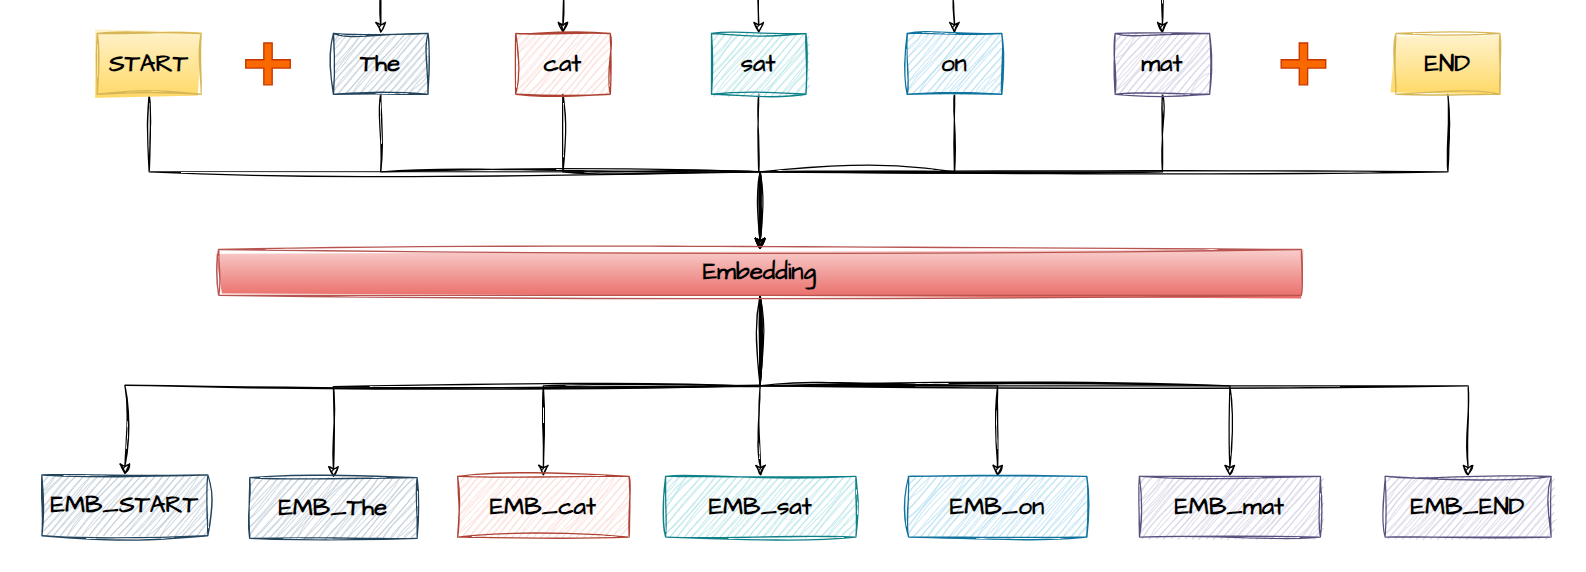

## Step 3: Positional Encoding

- **What is Positional Encoding?**: Since the transformer model does not have any inherent notion of the order of tokens, we add **positional encodings** to the output embeddings. These encodings provide information about the position of each token in the sequence.

- **How it Works**: Positional encodings are added element-wise to the output embeddings. For example:
  - The positional encoding for the first token (`[START]`) might be `[0.0, 1.0, 0.0]`.
  - The positional encoding for the second token (`"The"`) might be `[0.1, 0.9, 0.1]`.
  - The positional encoding for the third token (`"cat"`) might be `[0.2, 0.8, 0.2]`.
  - And so on for the other tokens.


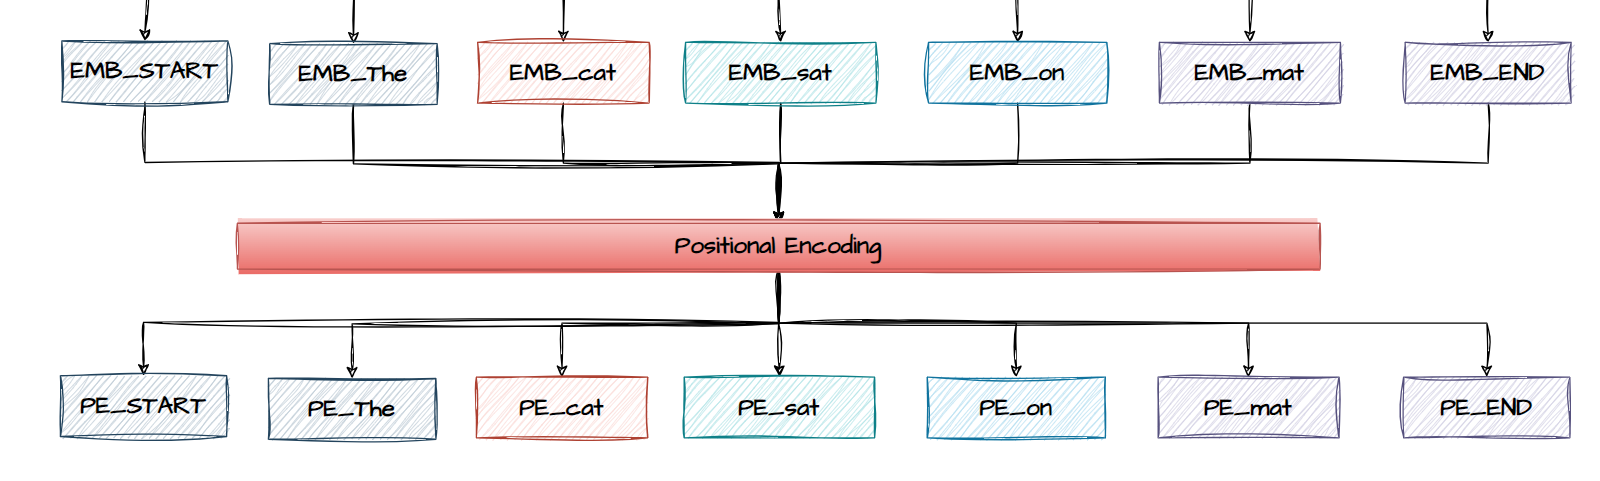

- **Example**:
  - **Output Embeddings**: 
    - `E_[START] = [0.1, 0.2, 0.3]`
    - `E_The = [0.2, 0.1, 0.4]`
    - `E_cat = [0.3, 0.5, 0.1]`
    - `E_sat = [0.4, 0.3, 0.2]`
    - `E_on = [0.5, 0.4, 0.1]`
    - `E_mat = [0.2, 0.4, 0.2]`
    - `E_[END] = [0.3, 0.2, 0.5]`
  - **Positional Encodings**:
    - `P_[START] = [0.0, 1.0, 0.0]`
    - `P_The = [0.1, 0.9, 0.1]`
    - `P_cat = [0.2, 0.8, 0.2]`
    - `P_sat = [0.3, 0.7, 0.3]`
    - `P_on = [0.4, 0.6, 0.4]`
    - `P_mat = [0.6, 0.4, 0.6]`
    - `P_[END] = [0.7, 0.3, 0.7]`
  - **Output Embeddings with Positional Encoding**:
    - `E_[START] + P_[START] = [0.1 + 0.0, 0.2 + 1.0, 0.3 + 0.0] = [0.1, 1.2, 0.3]`
    - `E_The + P_The = [0.2 + 0.1, 0.1 + 0.9, 0.4 + 0.1] = [0.3, 1.0, 0.5]`
    - `E_cat + P_cat = [0.3 + 0.2, 0.5 + 0.8, 0.1 + 0.2] = [0.5, 1.3, 0.3]`
    - And so on for the other tokens.


## Step 4: Masked Multi-Head Attention

#### How it Works

1. **Input to the Layer**: The output embeddings with positional encodings are fed into the masked multi-head attention layer.

2. **Attention Scores Calculation**:
   - The attention scores are computed using the dot product of the Query (Q) and Key (K) matrices, followed by scaling.
   - A mask is applied to prevent the decoder from attending to future tokens. This means that for a given token at position *i*, it can only attend to tokens from position *0* to *i*.

   - **Example**: If we are processing the token `"cat"` (position 3), the attention mask will ensure that it only attends to `[START]`, `"The"`, and `"cat"`.

3. **Softmax Operation**: After applying the mask, the scores are passed through a softmax function to obtain attention weights.

4. **Weighted Sum**: The attention weights are used to compute a weighted sum of the Value (V) vectors, resulting in a context vector for each token.

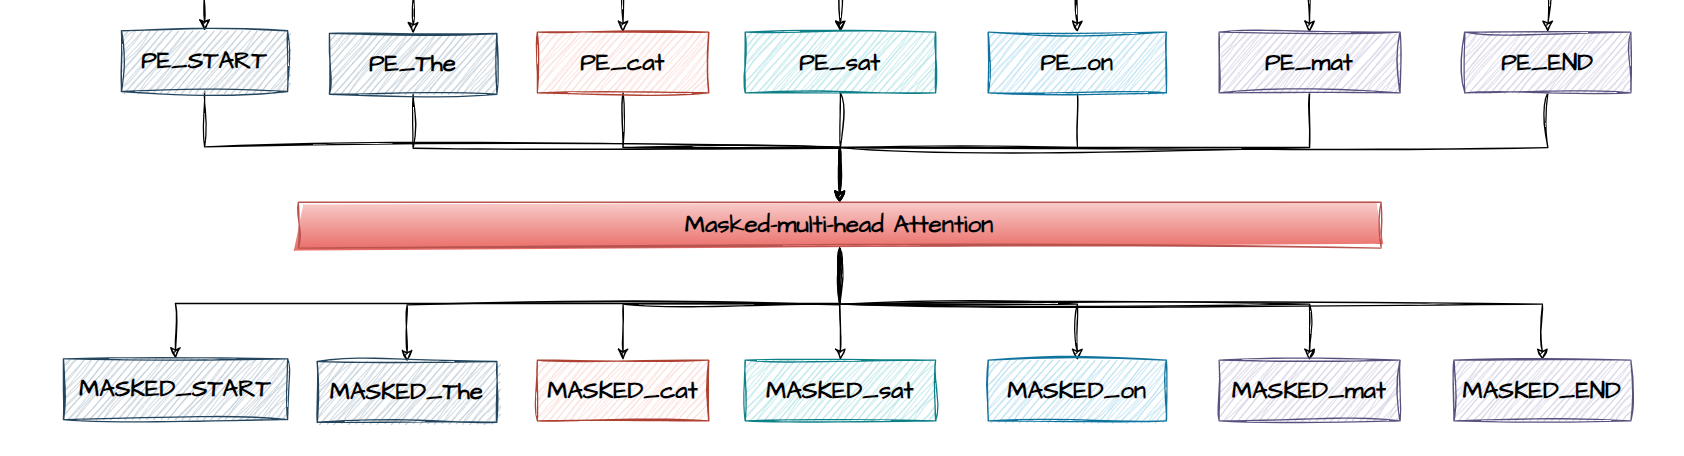

## Add & Norm After Masked Multi-Head Attention

1. **Residual Connection**: The output of the masked multi-head attention layer is added back to its input. This helps the model retain information from earlier layers.

2. **Layer Normalization**: After adding the residual connection, layer normalization is applied. This normalizes the output across the features, which helps improve convergence during training.

#### How it Works

- The output from the masked multi-head attention layer is combined with its input (the output embeddings with positional encodings).
- The result is then normalized using layer normalization.

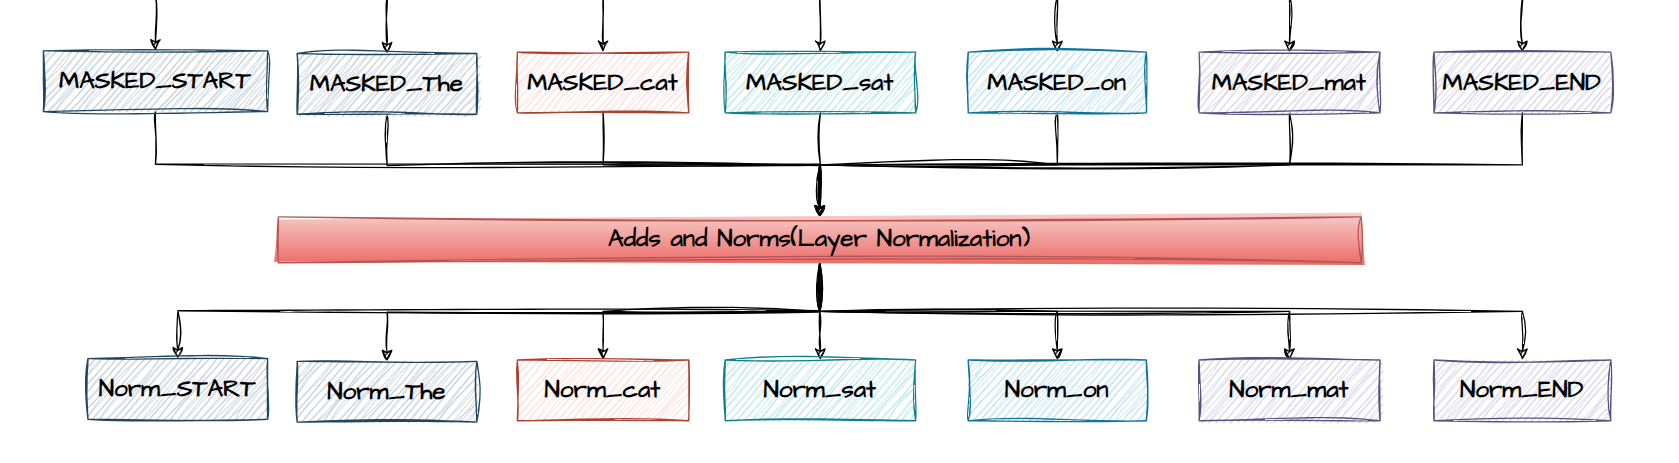

## Step 05: Multi-Head Attention

This component is crucial for allowing the decoder to attend to both the previously generated tokens and the contextual information provided by the encoder output.

The multi-head attention component in the decoder takes two inputs:
1. Output from Masked Multi-Head Attention
2. Encoder Output

### How It Works

1. **Input to the Multi-Head Attention Layer**:
   - The multi-head attention layer takes two sets of inputs:
     - The output from the masked multi-head attention layer (context vectors).
     - The encoder output (contextualized embeddings).

2. **Attention Scores Calculation**:
   - Attention scores are calculated using the Query (Q) vectors derived from the output of the masked multi-head attention and the Key (K) vectors derived from the encoder output.
   - This allows the decoder to focus on relevant parts of the encoder output while considering the context from the previously generated tokens.

3. **Weighted Sum**:
   - The attention scores are used to compute a weighted sum of the Value (V) vectors, which are also derived from the encoder output. This results in a new set of context vectors that incorporate information from both the encoder output and the previously generated tokens.

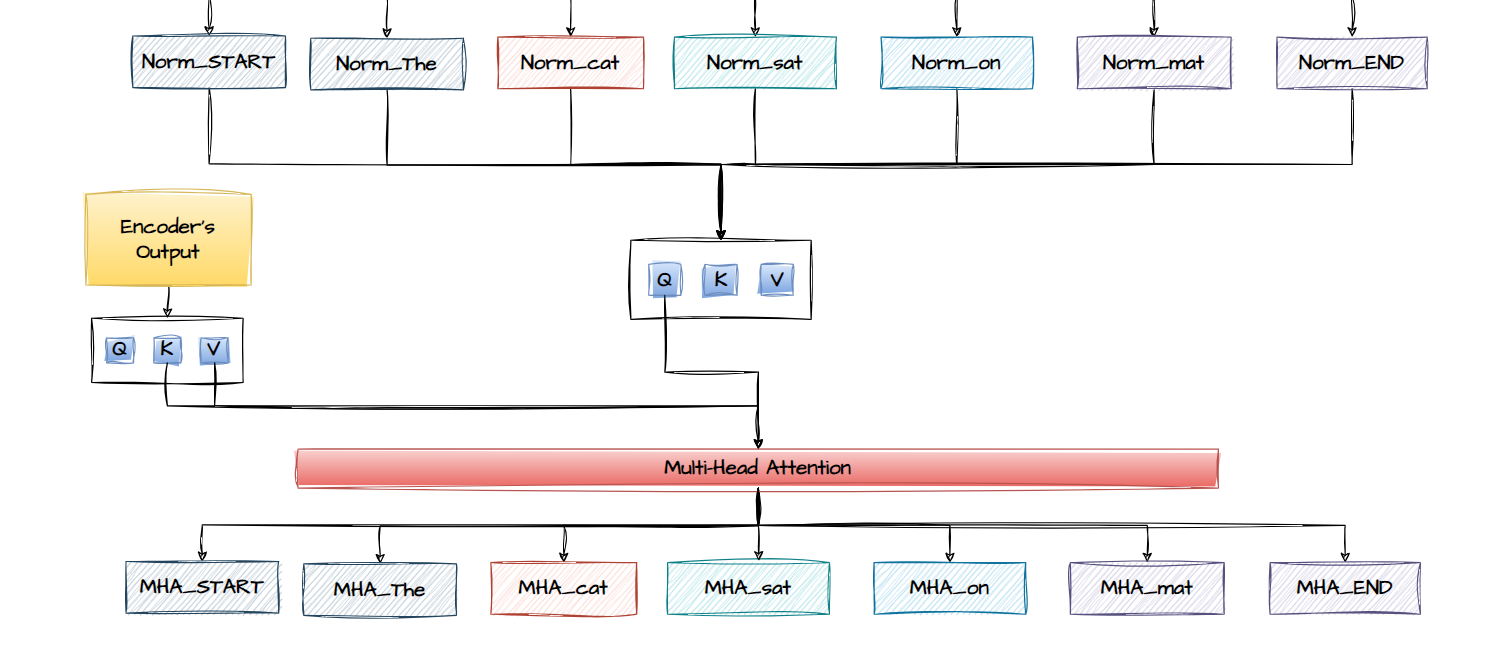

## Add & Norm After Multi-Head Attention

- After the multi-head attention layer, the output undergoes an **Add & Norm** step, which includes residual connections and layer normalization. This helps stabilize the training process.

- **Residual Connection**: The output from the multi-head attention layer is added back to its input (the output from the masked multi-head attention). This helps retain information from earlier layers.

- **Layer Normalization**: The combined output is then normalized using layer normalization, which improves convergence during training.

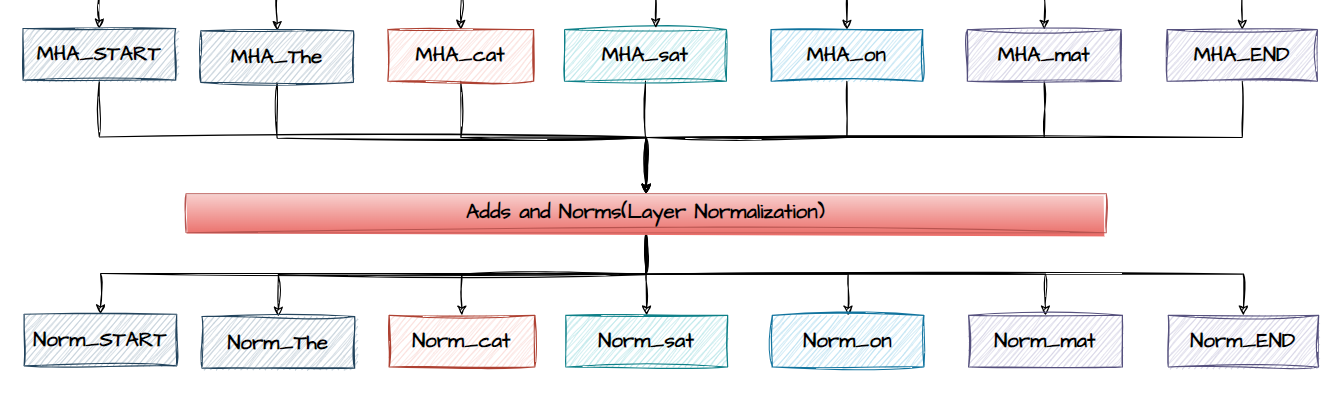

## Step 06: Feed-Forward Network


### How It Works

1. **Input to the Feed-Forward Network**:
   - The input to the feed-forward network is the output from the multi-head attention layer, which contains context vectors that have been informed by both the encoder output and the previously generated tokens.

2. **Processing**:
   - Each context vector is passed through two linear layers:
     - The first linear layer increases the dimensionality of the vector.
     - The ReLU activation function introduces non-linearity.
     - The second linear layer reduces the dimensionality back to the original size.

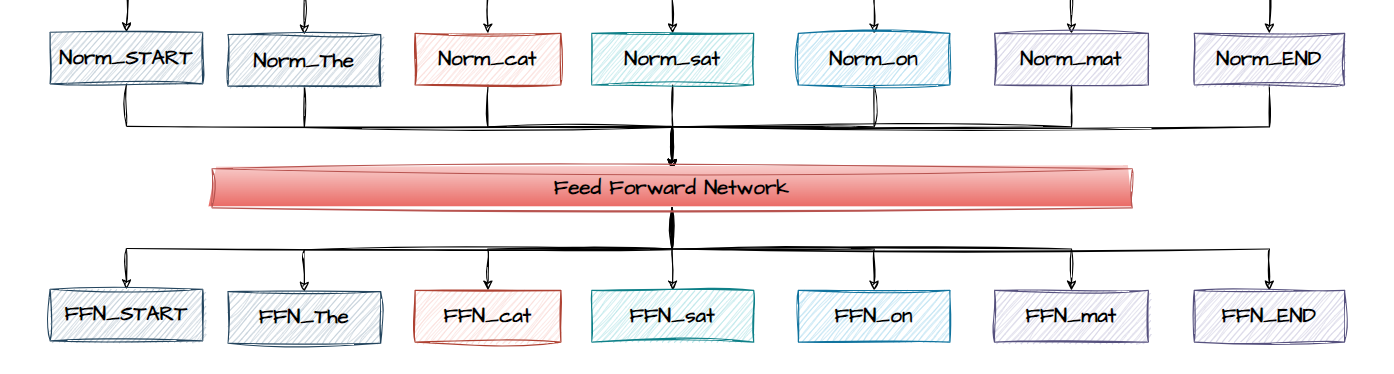

### Example

- If the context vector for `"cat"` after multi-head attention is `[0.5, 1.3, 0.3]`, it might be transformed as follows:
  - **First Linear Transformation**: `[0.5, 1.3, 0.3]` → `[1.0, 0.7]` (increased dimensionality)
  - **ReLU Activation**: `[1.0, 0.7]` → `[1.0, 0.7]` (remains the same since values are positive)
  - **Second Linear Transformation**: `[1.0, 0.7]` → `[0.4, 0.6, 0.2]` (reduced back to original size)

## Add & Norm After Feed-Forward Network

- After the feed-forward network, the output undergoes another **Add & Norm** step. This step is crucial for stabilizing the training process, similar to the previous Add & Norm step.

### Key Points

- **Residual Connection**: The output from the feed-forward network is added back to its input (the output from the multi-head attention). This helps retain information from earlier layers.

- **Layer Normalization**: The combined output is then normalized using layer normalization, which improves convergence during training.

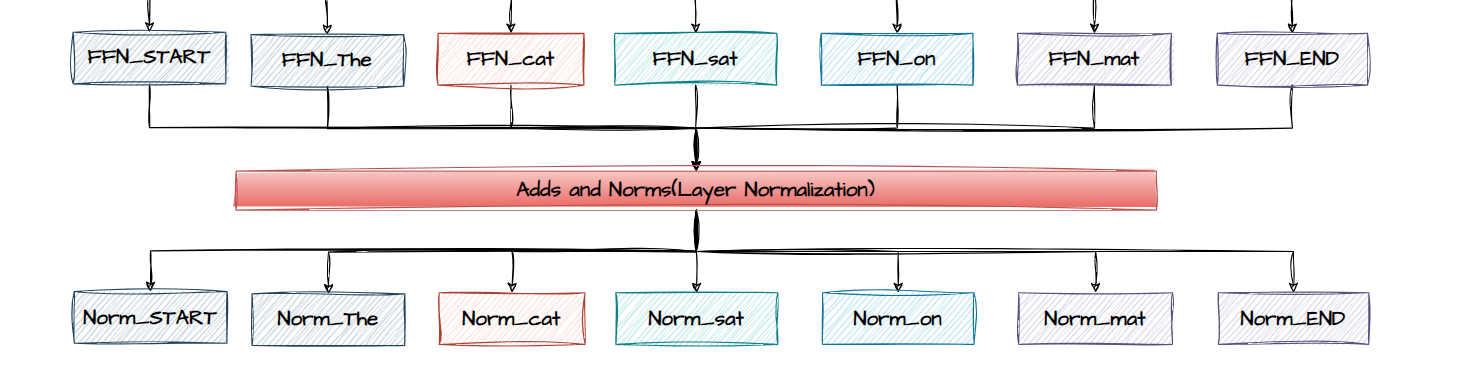

## Step 07: Generating Output Probabilities

After the Add & Norm step, the decoder's output is ready to be transformed into probabilities for the next token in the sequence.

### How It Works

1. **Linear Transformation**:
   - The output from the Add & Norm step is passed through a linear layer that maps the output to the size of the vocabulary. This means that each output vector is transformed into a vector of probabilities corresponding to each token in the vocabulary.

2. **Softmax Function**:
   - The softmax function is applied to the output of the linear transformation. This converts the raw scores into a probability distribution, where the probabilities sum up to 1. Each probability indicates the likelihood of each token being the next token in the sequence.

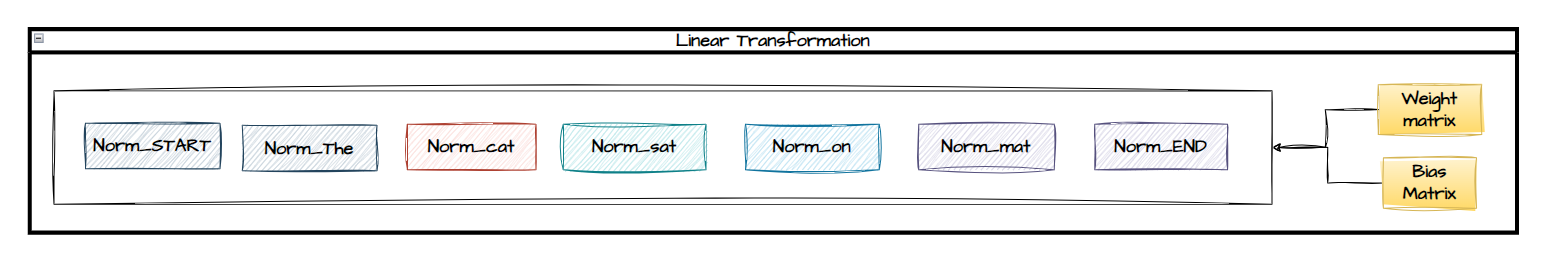

### Example

- If the output from the Add & Norm step is a vector `[0.5, 1.2, 0.3]` and the weight matrix is:
```
W = [[0.1, 0.2, 0.5], 
     [0.4, 0.3, 0.6], 
     [0.7, 0.8, 0.9]]
```
- The linear transformation would produce a vector of size equal to the vocabulary size (let’s say vocabulary size is 3 for simplicity):
```
Output = [0.5, 1.2, 0.3] * W + b
```
- This results in a new vector that represents the scores for each token in the vocabulary.

## Step 08: Softmax Function

### What is Softmax?

- The softmax function is applied to the output of the linear transformation to convert the raw scores into a probability distribution over the vocabulary. This is essential for determining the likelihood of each token being the next token in the sequence.

### How Softmax Works

1. **Exponentiation**: Each logit in the vector is exponentiated. This ensures all values are positive and emphasizes larger logits.
  
2. **Normalization**: Each exponentiated value is divided by the sum of all exponentiated values. This step ensures that the probabilities sum to 1.

### Softmax Formula

Mathematically, the softmax function is defined as:
$$
P(y_i) = \frac{e^{Z_i}}{\sum_{j} e^{Z_j}}
$$
Where:
- $$ P(y_i) $$ is the probability of token $$ i $$.
- $$ Z_i $$ is the logit for token $$ i $$.
- The denominator sums the exponentials of all logits to normalize the scores.

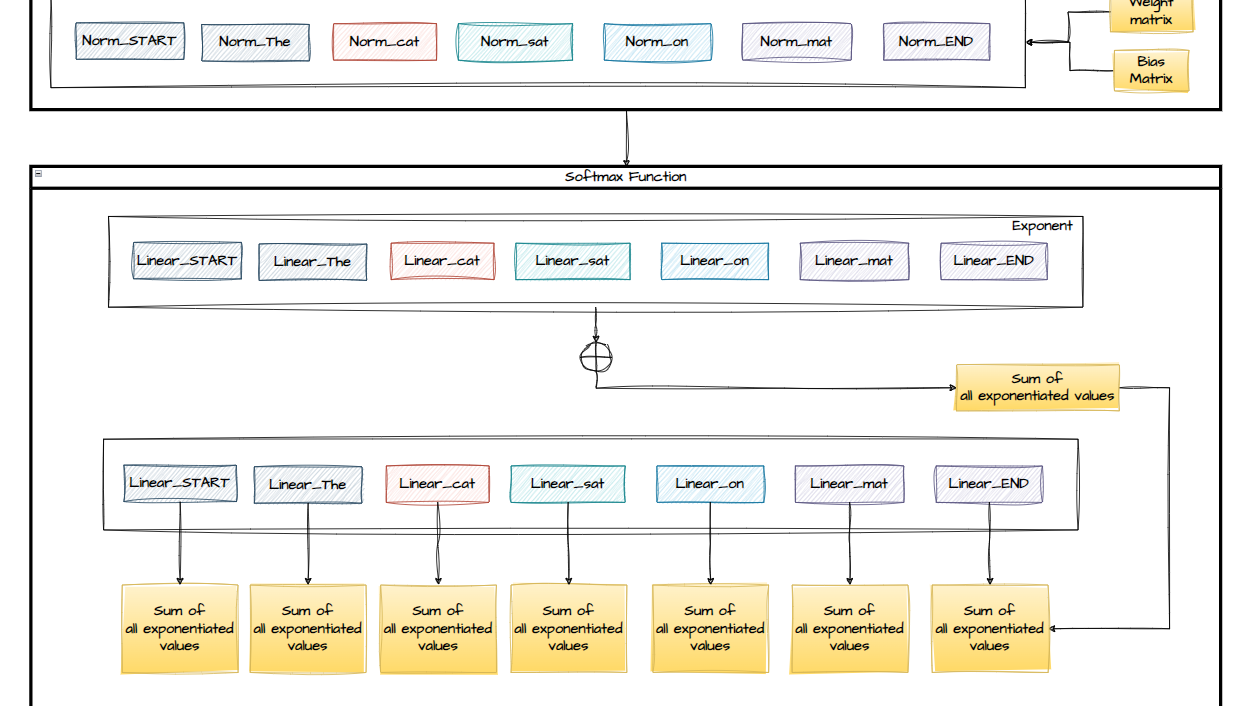

### Example Calculation

Using our example logits:
- **Exponentiated Values**: 
  - $$ e^{Z} \approx [2.718, 7.389, 1.649, 4.481, 1.000] $$

- **Sum of Exponentials**: 
  - $$ \text{Sum} \approx 17.237 $$

- **Probabilities**:
  - $$ P(y_1) = \frac{2.718}{17.237} \approx 0.158 $$
  .
  
  - $$ P(y_2) = \frac{7.389}{17.237} \approx 0.429 $$
  - And so on for the other tokens.

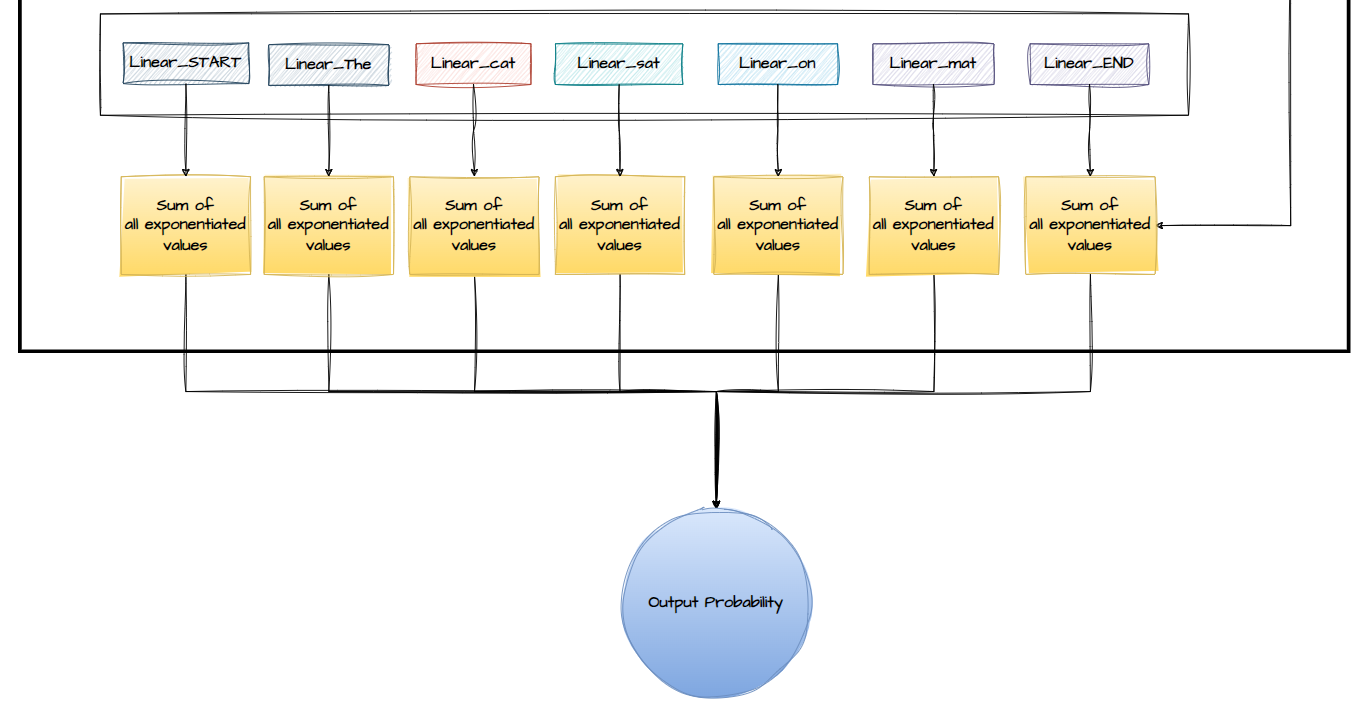

---

After the softmax function, the transformer decoder selects the next token based on the probabilities, updates the target sequence, and keeps repeating this process until the output sequence is complete. This allows the decoder to create meaningful sentences based on the input it has received.

## Selecting the Next Token

The decoder can choose the next token in one of two ways:

1. **Argmax**: Select the token with the highest probability. This is a straightforward method.

2. **Sampling**: Randomly pick a token based on the probabilities. This adds some variety to the output.

For example, if the softmax output gives us:
$$
P(y) \approx [0.158, 0.429, 0.096, 0.260, 0.058]
$$
Using **argmax**, the decoder would select the second token (with a probability of 0.429). Using **sampling**, it might select any token according to the probabilities.

## Updating the Target Sequence

After choosing the next token, the decoder appends it to the target sequence. This updated target sequence will be used for the next prediction.

For instance, if the decoder selects the token `"cat"`, the target sequence becomes:
- Previous Target Sequence: `["[START]", "The"]`
- Updated Target Sequence: `["[START]", "The", "cat"]`

## Iteration

The decoder continues this process iteratively. The updated target sequence is fed back into the decoder, and the steps of linear transformation, softmax, and token selection are repeated until an end token (`[END]`) is generated.

The process might look like this:
- Updated Target Sequence: `["[START]", "The", "cat"]`
- Next token selected: `"sat"`
- Further updated Target Sequence: `["[START]", "The", "cat", "sat"]`
- This continues until the `[END]` token is generated.


By selecting tokens based on the softmax probabilities, updating the target sequence, and iterating this process, the transformer decoder can create coherent and meaningful output sentences. This allows the model to generate relevant responses based on the input it has received.